In [18]:
#Import all needed libraries and packages
import pandas as pd
import seaborn as sns
import statistics as sts
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
from google.colab import drive
drive.mount("/content/drive/")

Mounted at /content/drive/


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Airlines.csv")

In [4]:
df.describe()

,id,Flight,DayOfWeek,Time,Length,Delay
count,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000,539383.000000
mean,269692.000000,2427.928630,3.929668,802.728963,132.202007,0.445442
std,155706.604461,2067.429837,1.914664,278.045911,70.117016,0.497015
min,1.000000,1.000000,1.000000,10.000000,0.000000,0.000000
25%,134846.500000,712.000000,2.000000,565.000000,81.000000,0.000000
50%,269692.000000,1809.000000,4.000000,795.000000,115.000000,0.000000
75%,404537.500000,3745.000000,5.000000,1035.000000,162.000000,1.000000
max,539383.000000,7814.000000,7.000000,1439.000000,655.000000,1.000000


#Preproccessing

In [5]:
df.isnull().sum()

id             0
Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [6]:
df["Delay"].value_counts()

0    299119
1    240264
Name: Delay, dtype: int64

In [7]:
Dmaj = df[(df["Delay"] == 0)]
Dmin = df[(df["Delay"] == 1)]

#resampling delays to match the amount of non-delays
Dmin_resampled = resample(Dmin, replace=True, n_samples= 299119, random_state=42)

df = pd.concat([Dmin_resampled, Dmaj])

In [8]:
df["Delay"].value_counts()

1    299119
0    299119
Name: Delay, dtype: int64

#Classifier

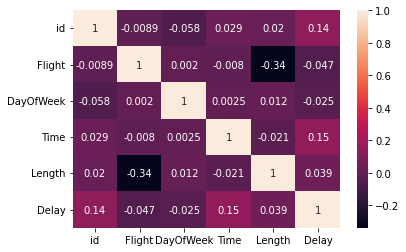

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
#Independent and Dependent variables
X = df[["Length", "Time", "DayOfWeek"]]
y = df["Delay"]

In [11]:
#Splitting the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [12]:
#Training the model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, ..., 0, 0, 1])

In [13]:
#Access the score for the model
knn.score(X_test,y_test)

0.6314271864134795

In [14]:
#Find the best number of K 
score=[]
for i in range(5, 35, 2): 
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    score.append(knn.score(X_test,y_test))

[Text(0.5, 1.0, 'Performance KNN regression')]

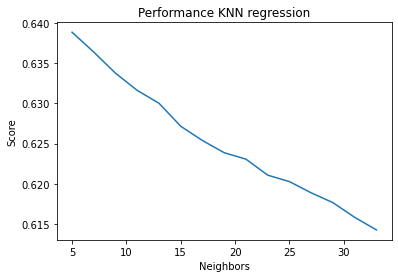

In [16]:
#Graph the regression performance
perf = pd.DataFrame({'Neighbors': [*range(5, 35, 2)],
                   'Score': score
                   })

sns.lineplot(data=perf,x='Neighbors',y='Score', palette='husl').set(title='Performance KNN regression')

#Final Thoughts

It seems like there is a negative linear correlation with the score of the model and the number of Neighbors. The KNN classifier was correct with its predictions 63 percent of the time. There aren't many features that have correlations with the delay status of the flight. 